In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('../data/raw/reviews_raw.csv')
df.head()

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,cb37b096-e071-4f0f-a8fd-067b7d71706d,CBE ይለያል።,5,2025-11-29 17:22:32,Kamil Tesfaye,0,NaN,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
1,70f504ff-daed-40d9-9c89-cc49a95ef659,it's special for me,5,2025-11-29 15:54:14,Abde Semed,0,NaN,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29 08:17:45,TOMIZ Creativity,0,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play
3,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,NaN,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
4,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,Betelhem Kebede,0,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play


In [2]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      983 non-null    object
 1   review_text    983 non-null    object
 2   rating         983 non-null    int64 
 3   review_date    983 non-null    object
 4   user_name      983 non-null    object
 5   thumbs_up      983 non-null    int64 
 6   reply_content  3 non-null      object
 7   bank_code      983 non-null    object
 8   bank_name      983 non-null    object
 9   app_id         767 non-null    object
 10  source         983 non-null    object
dtypes: int64(2), object(9)
memory usage: 84.6+ KB


review_id          0
review_text        0
rating             0
review_date        0
user_name          0
thumbs_up          0
reply_content    980
bank_code          0
bank_name          0
app_id           216
source             0
dtype: int64

In [3]:
df['review_date'] = pd.to_datetime(df['review_date'])
df['rating'].value_counts().sort_index()
df.groupby('bank_name')['rating'].mean()


bank_name
Amharabank                     4.306011
Awash Bank                     4.342500
Commercial Bank of Ethiopia    4.127500
Name: rating, dtype: float64

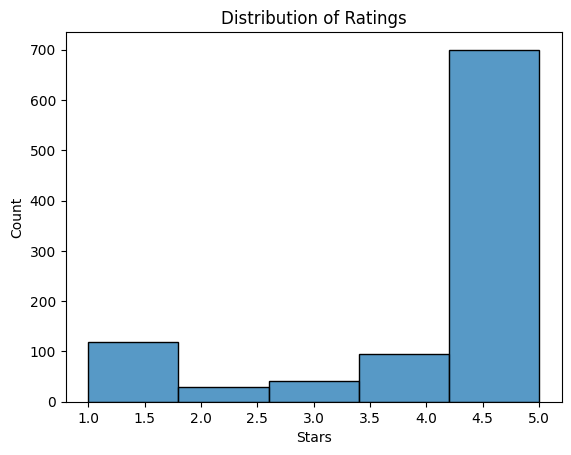

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['rating'], bins=5, kde=False)
plt.title("Distribution of Ratings")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()

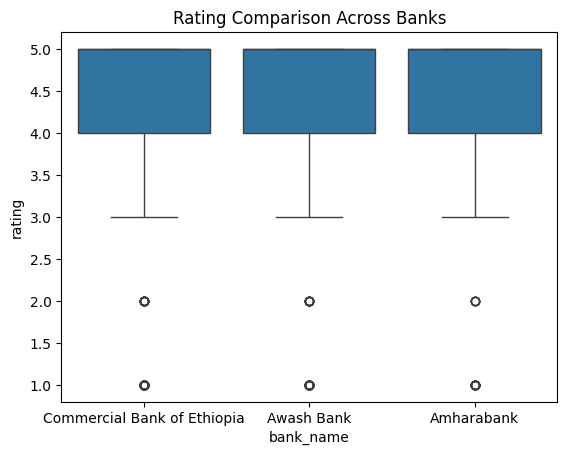

In [5]:
sns.boxplot(x='bank_name', y='rating', data=df)
plt.title("Rating Comparison Across Banks")
plt.show()

In [6]:
import sys
!{sys.executable} -m pip install textblob
!{sys.executable} -m textblob.download_corpora


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [8]:
from textblob import TextBlob

df['sentiment'] = df['review_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df[['review_text', 'sentiment']].head()


,review_text,sentiment
0,CBE ይለያል።,0.000000
1,it's special for me,0.357143
2,Make it user friendly.,0.375000
3,maaliif daddafee install gaafata,0.000000
4,good app,0.700000


In [9]:
df['sentiment'].describe()

count    983.000000
mean       0.380583
std        0.395146
min       -1.000000
25%        0.000000
50%        0.408333
75%        0.700000
max        1.000000
Name: sentiment, dtype: float64

In [10]:
def label_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(label_sentiment)
df['sentiment_label'].value_counts()


sentiment_label
Positive    633
Neutral     294
Negative     56
Name: count, dtype: int64

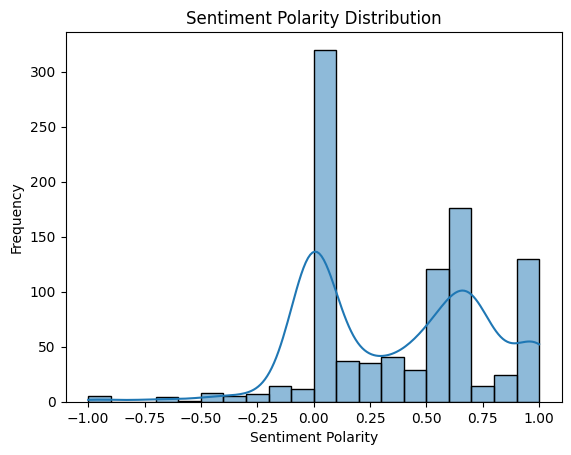

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()
